In [86]:
#IPython notebook plot formatting
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)

import matplotlib.pyplot as plt

#Load the modules
import approximations as a
import distributions as d
import DoyleMLToolkit as dmlt

#Make sure they get reloaded after changes
a = reload(a)
d = reload(d)
sm = reload(dmlt)

Populating the interactive namespace from numpy and matplotlib


In [87]:
#Create a test model - classify based on gender from impedance magnitude position S
GenderFromZS = dmlt.ODFC(a.ComplexFourier,d.UnweightedGaussianClassification,50)

#Create a test model - classify based cancer readings of organs
#CancerModel = dmlt.ODFC(a.ComplexFourier,d.UnweightedGaussianClassification,20)

In [88]:
#Load the relevant data
#GenderZSData = GenderFromZS.load("impedance_data/ImpedanceGender.csv","impedance_data/ImpedanceS.csv",False,True)
GenderZSData = GenderFromZS.load("water_test_data/waterClasses.csv","water_test_data/node1.csv",False,True)
#KidneyAA1Data = CancerModel.load([],"kidney/KidneyAA1.csv",False,True)
#KidneyBB1Data = CancerModel.load("kidney/BB1Class.csv","kidney/KidneyBB1.csv",False,True)
#KidneyCC1Data = CancerModel.load("kidney/CC1Class.csv","kidney/KidneyCC1.csv",False,True)

#UterusCOXData = CancerModel.load("uterus_coax/COX1Class.csv","uterus_coax/COX1.csv",False,True)

#UterusA1Data = CancerModel.load([],"uterus_other/A1.csv",False,True)
#UterusAA1Data = CancerModel.load([],"uterus_other/AA1.csv",False,True)
#UterusB1Data = CancerModel.load([],"uterus_other/B1.csv",False,True)
#UterusBB1Data = CancerModel.load([],"uterus_other/BB1.csv",False,True)

#print sum(GenderZSData.getWeights(0))

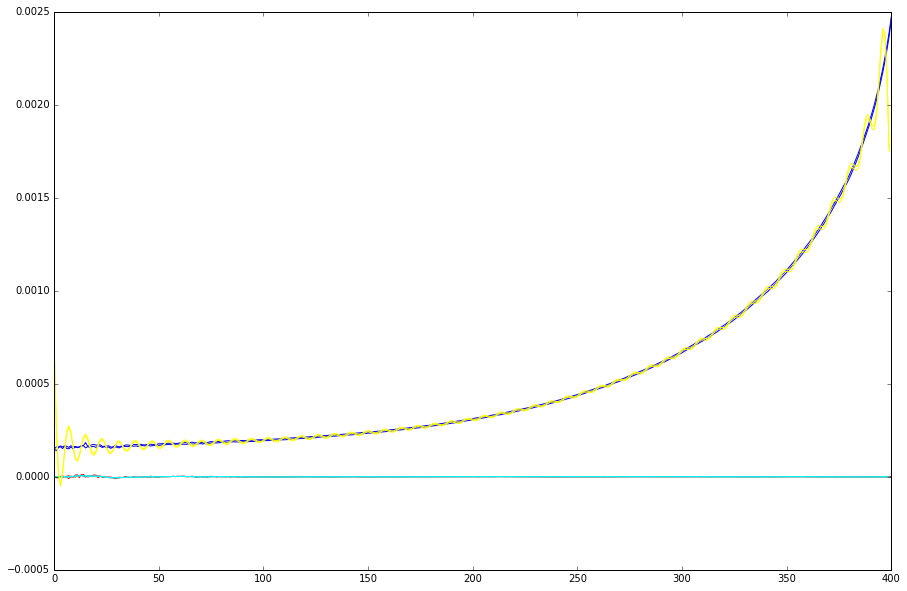

In [92]:
#Plot a few rows of the data
imaginary = 1

#Healthy
#CancerModel.plotSample(KidneyBB1Data,0,'#ff7777',imaginary)
#CancerModel.plotSample(KidneyBB1Data,1,'#ff7777',imaginary)

#Cancer
#CancerModel.plotSample(KidneyBB1Data,12,'#770000',imaginary)
#CancerModel.plotSample(KidneyBB1Data,13,'#770000',imaginary)

#Healthy
#CancerModel.plotSample(KidneyCC1Data,12,'#7777ff',imaginary)
#CancerModel.plotSample(KidneyCC1Data,13,'#7777ff',imaginary)

#Cancer
#CancerModel.plotSample(KidneyCC1Data,0,'#000077',imaginary)
#CancerModel.plotSample(KidneyCC1Data,1,'#000077',imaginary)


#Female
GenderFromZS.plotSample(GenderZSData,1,'#ff0000',imaginary)
GenderFromZS.plotSample(GenderZSData,2,'#ff0000',imaginary)
#GenderFromZS.plotSample(GenderZSData,3,'#ff0000',imaginary)

#Male
GenderFromZS.plotSample(GenderZSData,11,'#0000ff',imaginary)
GenderFromZS.plotSample(GenderZSData,12,'#0000ff',imaginary)
#GenderFromZS.plotSample(GenderZSData,37,'#0000ff',imaginary)

#Male test
#GenderFromZS.plotSample(GenderZSData,4,'#00ff00',imaginary)
#GenderFromZS.plotSample(GenderZSData,9,'#00ff00',imaginary)


#Also plot their approximations on top of them
GenderFromZS.plotApproximation(GenderZSData,1,'#00ffff',imaginary)
GenderFromZS.plotApproximation(GenderZSData,2,'#00ffff',imaginary)
#GenderFromZS.plotApproximation(GenderZSData,3,'#00ffff',imaginary)

GenderFromZS.plotApproximation(GenderZSData,11,'#ffff00',imaginary)
GenderFromZS.plotApproximation(GenderZSData,12,'#ffff00',imaginary)
#GenderFromZS.plotApproximation(GenderZSData,37,'#ffff00',imaginary)

#GenderFromZS.plotApproximation(GenderZSData,4,'#ff00ff',imaginary)
#GenderFromZS.plotApproximation(GenderZSData,9,'#ff00ff',imaginary)

plt.show()

In [93]:
#CancerModel.train(UterusCOXData)

#for i in CancerModel.predict(KidneyBB1Data):
#    print "%f%% %s"%(i[1]*100,i[0])


#Pull out a subset
testSix = GenderFromZS.train(GenderZSData,[1,2,3,11,12,13])
print "Training without these 6:"
print testSix.getAllY()
print ""

#Check the probability they're DI water
print "Probability each is DI Water:"
print [i[1] for i in GenderFromZS.predict(testSix,["0 mM" for i in range(6)])]
print ""

#And just classify them
print "Most likely classifications:"
print [i[0] for i in GenderFromZS.predict(testSix)]
print ""

#Test the accuracy of that subset
#print "Accuracy of those 6:"
#print "%d%%\n"%(GenderFromZS.test(testSix)*100.0 + 0.5)

#Train and test the whole set
#GenderFromZS.train(GenderZSData)
#print "Total accuracy: %d%%\n"%(GenderFromZS.test(GenderZSData)*100.0 + 0.5)

Training without these 6:
['0 mM', '0 mM', '0 mM', '50 mM', '50 mM', '50 mM']

Probability each is DI Water:
[1.0, 1.0, 1.0, 0.0, 0.0, 0.0]

Most likely classifications:
['0 mM', '0 mM', '0 mM', '50 mM', '50 mM', '50 mM']



In [55]:
#GenderFromZS.plotSample(GenderZSData,13,'#ff0000')
#GenderFromZS.plotSample(GenderZSData,14,'#ff0000')
#GenderFromZS.plotSample(GenderZSData,15,'#ff0000')

#GenderFromZS.plotSample(GenderZSData,33,'#0000ff')
#GenderFromZS.plotSample(GenderZSData,34,'#0000ff')
#GenderFromZS.plotSample(GenderZSData,37,'#0000ff')

#GenderFromZS.plotDistributionByClassification("0 mM","#ff0000")
#GenderFromZS.plotDistributionByClassification("50 mM","#0000ff")


CancerModel.plotDistributionByClassification("Healthy","#0000ff")


plt.show()

TypeError: evalH() takes exactly 5 arguments (4 given)

In [754]:
newData = GenderFromZS.genData("Male",3)
GenderFromZS.plotApproximation(newData,0,'#ff0000')
GenderFromZS.plotApproximation(newData,1,'#ff0000')
GenderFromZS.plotApproximation(newData,2,'#ff0000')

TypeError: can't convert complex to float